In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import seaborn as sns
import matplotlib.pyplot as plt

print("Completely Done")

Completely Done


# Read Data

In [ ]:
url = "https://raw.githubusercontent.com/lephanthutra/Principal-Component-Analysis-on-Olympic-data-/main/Olympic_Heptathlon_Seoul_1988_932_84.csv"

In [ ]:
df = pd.read_csv(url)
df.rename(columns = {'Unnamed: 0':'ID', 'X':'Name'}, inplace = True)
df

,ID,Name,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,1,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,2,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,3,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
3,4,Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
4,5,Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
5,6,Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411
6,7,Fleming (AUS),13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351
7,8,Greiner (USA),13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297
8,9,Lajbnerova (CZE),13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252
9,10,Bouraga (URS),13.25,1.77,12.62,23.59,6.28,39.06,134.74,6252


In [ ]:
df = df.iloc[:,2:]
df

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
3,13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
4,13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
5,13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411
6,13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351
7,13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297
8,13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252
9,13.25,1.77,12.62,23.59,6.28,39.06,134.74,6252


# Make a scatter plot of the data and calculate the correlation coefficients. 


In [ ]:
corr_matrix = df.corr()
corr_matrix

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
hurdles,1.000000,-0.811403,-0.651335,0.773721,-0.912134,-0.007763,0.779257,-0.923198
highjump,-0.811403,1.000000,0.440786,-0.487664,0.782442,0.002153,-0.591163,0.767359
shot,-0.651335,0.440786,1.000000,-0.682670,0.743073,0.268989,-0.419620,0.799699
run200m,0.773721,-0.487664,-0.682670,1.000000,-0.817205,-0.333043,0.616810,-0.864883
longjump,-0.912134,0.782442,0.743073,-0.817205,1.000000,0.067108,-0.699511,0.950437
javelin,-0.007763,0.002153,0.268989,-0.333043,0.067108,1.000000,0.020049,0.253147
run800m,0.779257,-0.591163,-0.419620,0.616810,-0.699511,0.020049,1.000000,-0.772776
score,-0.923198,0.767359,0.799699,-0.864883,0.950437,0.253147,-0.772776,1.000000


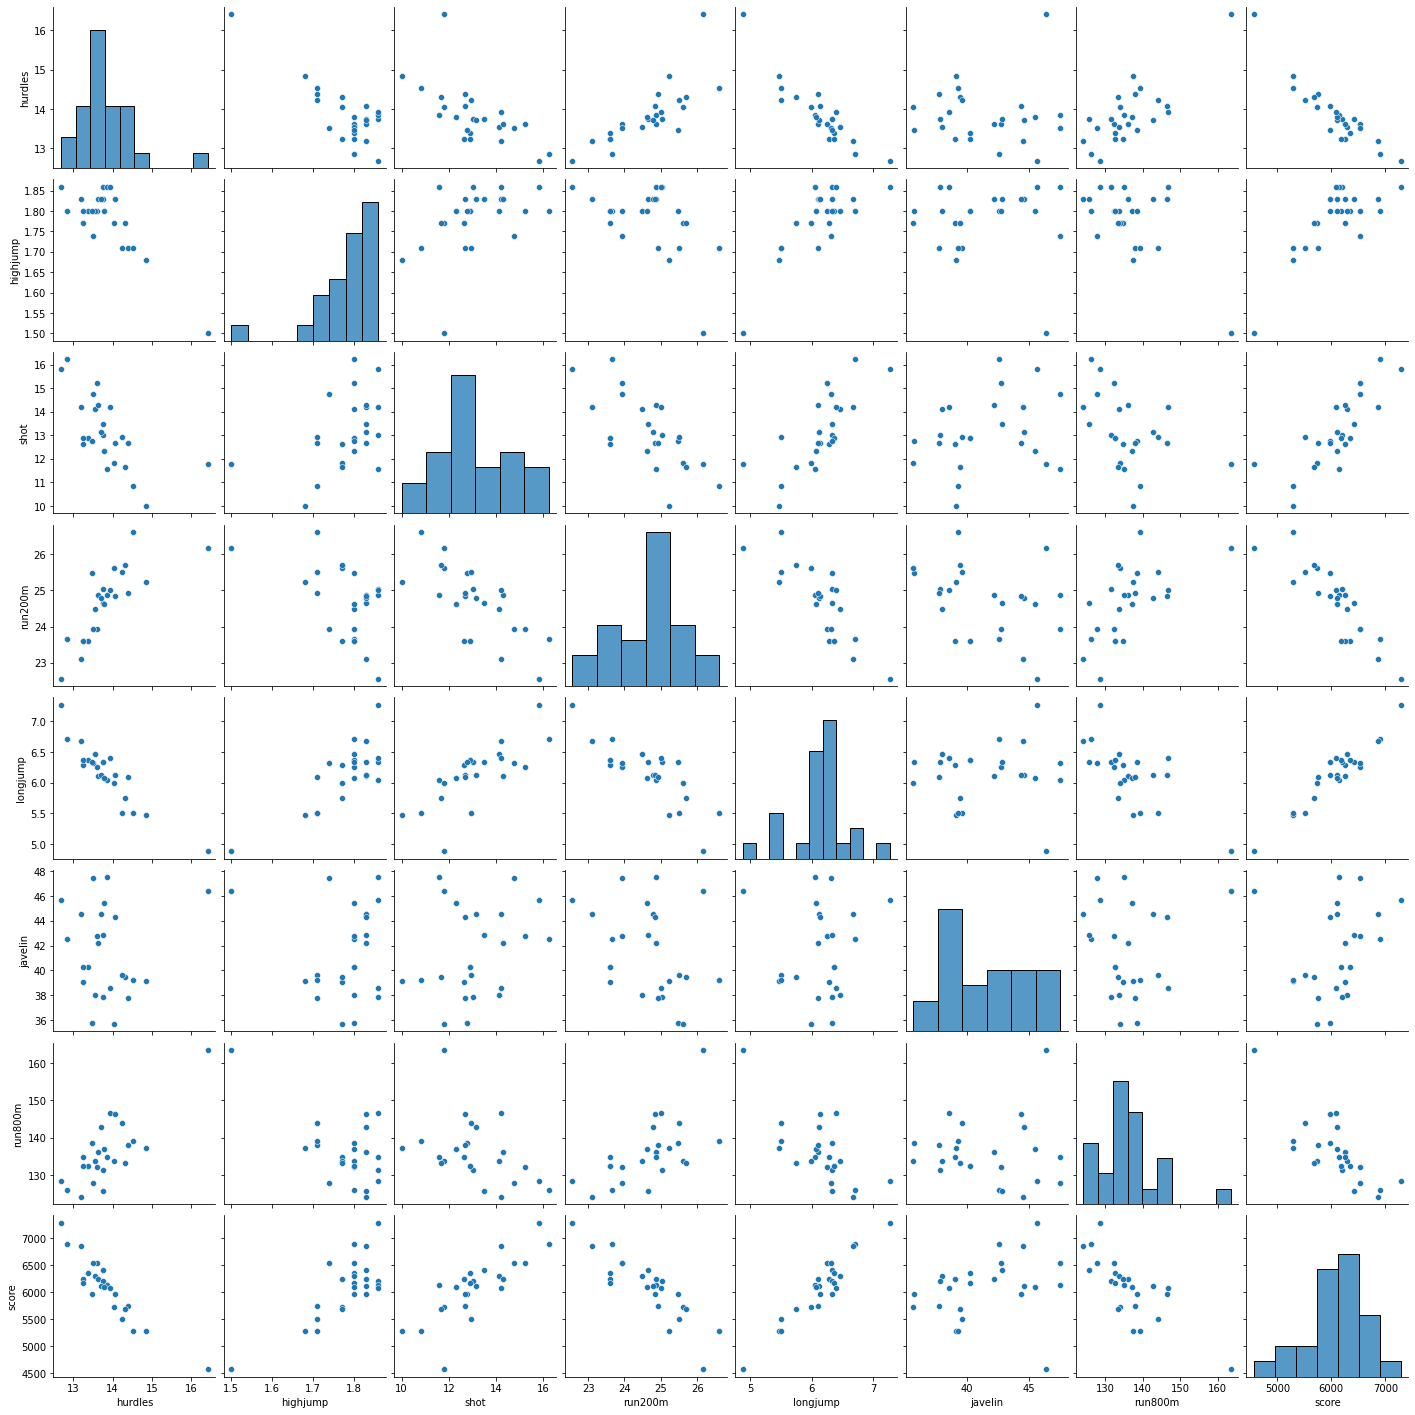

In [ ]:
sns.pairplot(df)

# PCA Implementation

## Step 1: Subtract The Mean

In [ ]:
mean = df.mean()
mean

hurdles      -13.8400
highjump      -1.7820
shot         -13.1176
run200m      -24.6492
longjump      -6.1524
javelin      -41.4824
run800m     -136.0540
score      -6090.6000
dtype: float64

In [ ]:
df = df - mean
df.head(3)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,54.21,7.206,55.1528,96.5076,25.7272,170.1072,536.672,25562.8
1,54.37,7.146,55.5828,97.5976,25.1672,167.0072,534.282,25168.8
2,54.72,7.176,53.5528,97.0476,25.1372,168.9872,532.362,25129.8


In [ ]:
df.shape

(25, 8)

## Step 2: Calculate Covariance Matrix

In [ ]:
cov_mat = np.cov(df)

## Step 3: Calculate eigenvalues and eigenvectors

In [ ]:
eigen_val, eigen_vec = LA.eig(cov_mat)

In [ ]:
eigen_vec.shape

(25, 25)

## Step 4:  Reduce dimensionality and form feature vector

Now that we have eigenvectors and eigenvalues we can begin the dimensionality reduction. As it turns out, the eigenvector with the highest eigenvalue is the principle component of the dataset. 

In fact the eigenvector with the largest eigenvalue represents the most signficant relationship between the data dimensions.

In [ ]:
# Sort eigenvalues in descending order
sorted_eigen_val = np.sort(eigen_val)[::-1]
sorted_eigen_val 

array([ 1.83592634e+09+0.00000000e+00j,  1.04072378e+03+0.00000000e+00j,
        3.17963202e+01+0.00000000e+00j,  4.56946421e+00+0.00000000e+00j,
        1.04409181e+00+0.00000000e+00j,  2.56680240e-01+0.00000000e+00j,
        1.73834502e-02+0.00000000e+00j,  4.27337837e-08+0.00000000e+00j,
        3.10763483e-08+1.29864283e-09j,  3.10763483e-08-1.29864283e-09j,
        2.30278649e-08+0.00000000e+00j,  1.90232267e-08+7.96512221e-09j,
        1.90232267e-08-7.96512221e-09j,  1.19940084e-08+0.00000000e+00j,
        8.32913063e-09+0.00000000e+00j,  1.58837388e-09+0.00000000e+00j,
       -7.68534585e-09+5.27621729e-09j, -7.68534585e-09-5.27621729e-09j,
       -9.34212254e-09+1.49834189e-09j, -9.34212254e-09-1.49834189e-09j,
       -1.73689362e-08+0.00000000e+00j, -2.14334423e-08+2.07007176e-09j,
       -2.14334423e-08-2.07007176e-09j, -3.56402423e-08+0.00000000e+00j,
       -4.68891753e-08+0.00000000e+00j])

In [ ]:
# asign index to the sorted eigenvalues 
idx = np.argsort(sorted_eigen_val)[::-1]
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
# significant features 
# I just take the most 2 important features 
feature_vector = eigen_vec[:8, idx[:2]]

In [ ]:
feature_vector

array([[ 0.20985202+0.j, -0.34924928+0.j],
       [ 0.20660644+0.j, -0.28693819+0.j],
       [ 0.20628704+0.j, -0.29482843+0.j],
       [ 0.20365533+0.j, -0.14072087+0.j],
       [ 0.20365496+0.j, -0.18833442+0.j],
       [ 0.20259857+0.j, -0.17776451+0.j],
       [ 0.20210212+0.j, -0.08828005+0.j],
       [ 0.20165526+0.j, -0.06763563+0.j]])

In [ ]:
feature_vector.shape

(8, 2)

## Step 5: Derive the data

The transposed feature vector is the row feature vector where the eigenvectors are now in the rows such that the most significant eigenvectors are at the top.

The row **zero mean data** is the mean adjusted data transposed, where the each row holds a separate dimension.

In [ ]:
row_feature_vector = feature_vector.T
row_feature_vector

array([[ 0.20985202+0.j,  0.20660644+0.j,  0.20628704+0.j,
         0.20365533+0.j,  0.20365496+0.j,  0.20259857+0.j,
         0.20210212+0.j,  0.20165526+0.j],
       [-0.34924928+0.j, -0.28693819+0.j, -0.29482843+0.j,
        -0.14072087+0.j, -0.18833442+0.j, -0.17776451+0.j,
        -0.08828005+0.j, -0.06763563+0.j]])

In [ ]:
row_zero_mean_data = df.T
row_zero_mean_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
hurdles,54.2100,54.3700,54.7200,55.1300,55.0300,55.2700,54.9000,55.0700,55.1500,54.7700,...,55.4500,54.9900,55.5900,55.9100,55.5600,55.8300,55.7500,56.3700,56.0500,57.9400
highjump,7.2060,7.1460,7.1760,7.1460,7.0860,7.1760,7.1460,7.1460,7.1760,7.1160,...,7.2060,7.1460,7.1760,7.0560,7.1160,7.1160,7.0560,7.0260,7.0560,6.8460
shot,55.1528,55.5828,53.5528,54.5828,54.1128,52.8528,52.2328,53.4828,53.6328,51.9728,...,53.5628,52.1028,52.0428,52.0328,51.1628,51.0128,52.3028,49.3528,50.1828,51.1328
run200m,96.5076,97.5976,97.0476,97.8676,97.8776,98.5976,97.5376,98.4276,98.8076,97.5376,...,98.9476,99.4176,98.7776,98.8676,99.5576,99.6376,99.4476,99.1776,100.5576,100.1076
longjump,25.7272,25.1672,25.1372,24.7072,24.7772,24.7872,24.8272,24.9272,24.5672,24.7372,...,24.8572,24.7972,24.5872,24.5572,24.4472,24.2072,23.9572,23.9272,23.9572,23.3372
javelin,170.1072,167.0072,168.9872,167.2272,171.9072,167.2672,164.7272,162.4472,166.6472,163.5072,...,163.0472,160.2072,168.7872,162.2072,160.1272,163.9272,164.0872,163.5872,163.7072,170.8272
run800m,536.6720,534.2820,532.3620,540.4020,536.0620,533.9520,540.7020,541.8120,544.2120,542.9020,...,554.8320,546.6420,554.5920,546.1820,542.0620,541.5120,552.1820,545.4620,547.3320,571.5920
score,25562.8000,25168.8000,25129.8000,24811.8000,24811.8000,24682.8000,24622.8000,24568.8000,24523.8000,24523.8000,...,24358.8000,24246.8000,24243.8000,24017.8000,24005.8000,23957.8000,23779.8000,23561.8000,23560.8000,22837.8000


In [ ]:
final_data = np.matmul(row_feature_vector, row_zero_mean_data)
final_data = pd.DataFrame(final_data.T)
final_data.rename(columns={0: 'vector 1', 1: 'vector 2'}, inplace = True)
final_data

,vector 1,vector 2
0,5346.935042+0.000000j,-1862.259526+0.000000j
1,5266.589611+0.000000j,-1835.062387+0.000000j
2,5258.280929+0.000000j,-1832.056371+0.000000j
3,5195.794626+0.000000j,-1811.417812+0.000000j
4,5195.751602+0.000000j,-1811.690495+0.000000j
5,5168.329305+0.000000j,-1801.795763+0.000000j
6,5156.660108+0.000000j,-1797.419739+0.000000j
7,5146.028285+0.000000j,-1794.032086+0.000000j
8,5138.347706+0.000000j,-1792.013412+0.000000j
9,5136.788249+0.000000j,-1790.553504+0.000000j


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


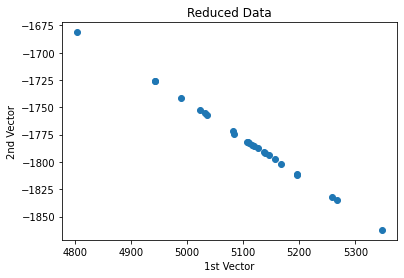

In [ ]:
plt.scatter(final_data['vector 1'], final_data['vector 2'])
plt.xlabel("1st Vector")
plt.ylabel("2nd Vector")
plt.title("Reduced Data")
plt.show()